In [1]:
import os.path as osp

import torch
import torch.nn.functional as F
from sklearn.metrics import f1_score

from torch_geometric.loader import DataLoader
from torch_geometric.data import Dataset, Data
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GATConv, SAGEConv, NNConv, GCNConv
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from torch_geometric.nn import Node2Vec

torch.manual_seed(42)

In [2]:
%run dataset_nc_per_modeltype.ipynb

Processing...
Done!


DATASET LOADED: USE per_model variable !!!
EnterpriseModelDatasetNCPerModeltype(110)


In [3]:
per_model["info"]

{'Concepts Model': 10,
 'Business Rule & Process Model': 12,
 '4EM General Model': 7,
 'Business Process Model': 43,
 'Actors and Resources Model': 11,
 'Technical Components and Requirements Model': 10,
 'Goal Model': 6,
 'Product-Service-Model': 4,
 'Goal & Business Rule Model': 7}

In [4]:
# use only business process models
bpms = per_model["data"]["Business Process Model"]

print(f'Number of graphs total: {len(bpms)}')
print(bpms[1].y)

Number of graphs total: 43
tensor([18, 16, 18, 18, 16, 16, 16, 13, 13, 18, 18, 16, 18, 13, 18, 18, 16, 29,
        16, 13, 18, 16, 10, 34, 18, 16, 16, 18,  3, 18, 16, 29, 18, 18, 18, 16])


In [5]:
bpm_node_classes = []

for graph in bpms:
    for nclass in graph.y:
        bpm_node_classes.append(nclass.item())
    
bpm_node_classes = list(set(bpm_node_classes))
print(bpm_node_classes)

new_node_classes = []
map_old_to_new_node_class = {}

for i, old_index in enumerate(bpm_node_classes):
    new_node_classes.append(node_classes[old_index])
    map_old_to_new_node_class[old_index] = i
    
    
print(new_node_classes)
print(map_old_to_new_node_class)

[34, 3, 10, 11, 13, 16, 18, 29]
['External Process', 'Join (OR)', 'Split (AND)', 'Join (AND)', 'Comment', 'Process', 'Information Set', 'Split (OR)']
{34: 0, 3: 1, 10: 2, 11: 3, 13: 4, 16: 5, 18: 6, 29: 7}


In [6]:
final_classes = [0, 1, 2] # 0: Information Set, 1: Process, 2: Other

for graph in bpms:
    for i, nclass in enumerate(graph.y):
        if(new_node_classes[map_old_to_new_node_class[nclass.item()]] == "Information Set"):
            graph.y[i] = 0
        elif(new_node_classes[map_old_to_new_node_class[nclass.item()]] == "Process"):
            graph.y[i] = 1
        else:
            graph.y[i] = 2

In [7]:
dataset = bpms

In [8]:
dataset[0].y

tensor([1, 0, 0, 0, 2, 1, 1, 1, 2, 1, 0])

In [9]:
values, counts = np.unique(dataset[0].y, return_counts=True)
values, counts

(array([0, 1, 2], dtype=int64), array([4, 5, 2], dtype=int64))

In [10]:
len(dataset)

43

In [11]:
train_loader = DataLoader(bpms, batch_size=len(bpms), shuffle=False)

In [12]:
x = []
edge_index = []
edge_attr = []
y = []
train_mask = []
test_mask = []
for batch in train_loader:
    x = batch.x
    edge_index = batch.edge_index
    edge_attr = batch.edge_attr
    y = batch.y
    train_mask = batch.train_mask
    test_mask = batch.test_mask

    
data = Data(x=x, 
            edge_index=edge_index,
            edge_attr=edge_attr,
            y=y,
            train_mask=train_mask,
            test_mask=test_mask
            ) 

num_nodes = data.x.shape[0]
print(data)

Data(x=[835, 1], edge_index=[2, 836], edge_attr=[836, 1], y=[835], train_mask=[835], test_mask=[835])


In [13]:
values, counts = np.unique(data.y, return_counts=True)
values, counts

(array([0, 1, 2], dtype=int64), array([367, 308, 160], dtype=int64))

In [14]:
data.y[:10]

tensor([1, 0, 0, 0, 2, 1, 1, 1, 2, 1])

In [15]:
embedding_dim = 8

Epoch: 01, Loss: 1.9833, Acc: 0.3949
Epoch: 02, Loss: 1.7402, Acc: 0.3949
Epoch: 03, Loss: 1.5954, Acc: 0.3897
Epoch: 04, Loss: 1.4547, Acc: 0.3949
Epoch: 05, Loss: 1.3280, Acc: 0.3949
Epoch: 06, Loss: 1.2293, Acc: 0.4000
Epoch: 07, Loss: 1.1749, Acc: 0.4051
Epoch: 08, Loss: 1.1215, Acc: 0.3897
Epoch: 09, Loss: 1.0778, Acc: 0.3949
Epoch: 10, Loss: 1.0297, Acc: 0.3846
Epoch: 11, Loss: 1.0007, Acc: 0.3846
Epoch: 12, Loss: 0.9880, Acc: 0.3846
Epoch: 13, Loss: 0.9547, Acc: 0.3795
Epoch: 14, Loss: 0.9475, Acc: 0.3795
Epoch: 15, Loss: 0.9265, Acc: 0.3795
Epoch: 16, Loss: 0.9136, Acc: 0.3795
Epoch: 17, Loss: 0.8996, Acc: 0.3949
Epoch: 18, Loss: 0.8913, Acc: 0.3846
Epoch: 19, Loss: 0.8820, Acc: 0.3846
Epoch: 20, Loss: 0.8732, Acc: 0.3795
Epoch: 21, Loss: 0.8700, Acc: 0.3744
Epoch: 22, Loss: 0.8613, Acc: 0.3744
Epoch: 23, Loss: 0.8612, Acc: 0.3795
Epoch: 24, Loss: 0.8574, Acc: 0.3744
Epoch: 25, Loss: 0.8568, Acc: 0.3744
Epoch: 26, Loss: 0.8500, Acc: 0.3795
Epoch: 27, Loss: 0.8494, Acc: 0.3795
E

C:\Users\alber\anaconda3\envs\pyg_env\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\alber\anaconda3\envs\pyg_env\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


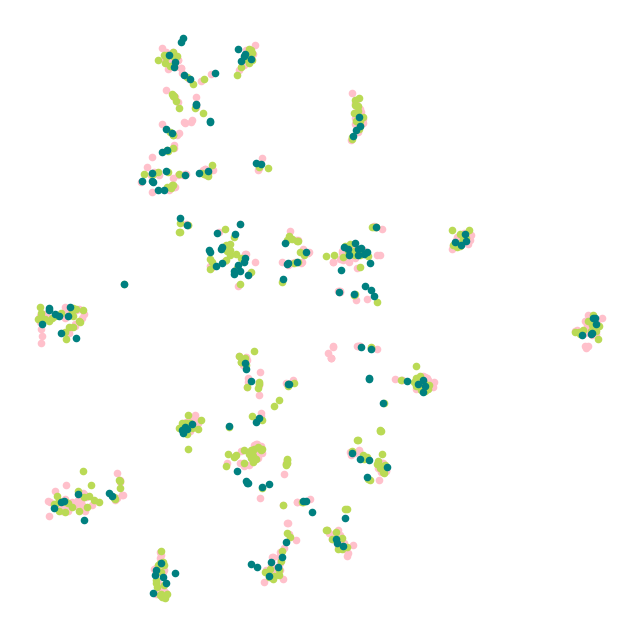

In [23]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Node2Vec(data.edge_index, embedding_dim=embedding_dim, walk_length=15,
                 context_size=10, walks_per_node=10,
                 num_negative_samples=1, p=1, q=1, sparse=True).to(device)

num_workers = 0
loader = model.loader(batch_size=64, shuffle=True, num_workers=num_workers)
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

def train():
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

@torch.no_grad()
def test():
    model.eval()
    z = model()
    acc = model.test(z[data.train_mask], data.y[data.train_mask],
                     z[data.test_mask], data.y[data.test_mask],
                     max_iter=150)
    return acc

loss_values = []
acc_values = []
for epoch in range(1, 101):
    loss = train()
    acc = test()
    loss_values.append(loss)
    acc_values.append(acc)
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Acc: {acc:.4f}')

@torch.no_grad()
def plot_points(colors):
    model.eval()
    z = model(torch.arange(data.num_nodes, device=device))
    z = TSNE(n_components=2).fit_transform(z.cpu().numpy())
    y = data.y.cpu().numpy()

    plt.figure(figsize=(8, 8))
    for i in range(len(new_node_classes)):
        plt.scatter(z[y == i, 0], z[y == i, 1], s=20, color=colors[i])
    plt.axis('off')
    plt.show()

colors = [
    '#ffc0cb', '#bada55', '#008080', '#420420', '#7fe5f0', '#065535',
    '#ffd700', '#9900ff', '#008080', '#420420', '#7fe5f0', '#065535',
    '#008080', '#420420', '#7fe5f0', '#ff00ff', '#993366', '#ff5050',
    '#ff9933', '#ffff66', '#ffffcc', '#0066cc', '#00cc66', '#333300',
    '#996600', '#99ff66', '#cc99ff', '#336699', '#33cc33', '#339966',
    '#cc9900', '#66ff66', '#6666ff', '#009999', '#666699', '#ffcccc',
]
plot_points(colors)

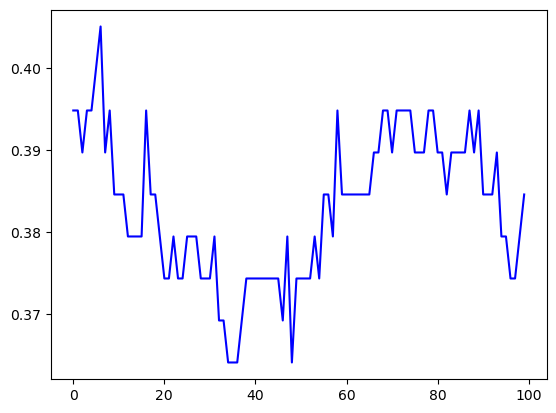

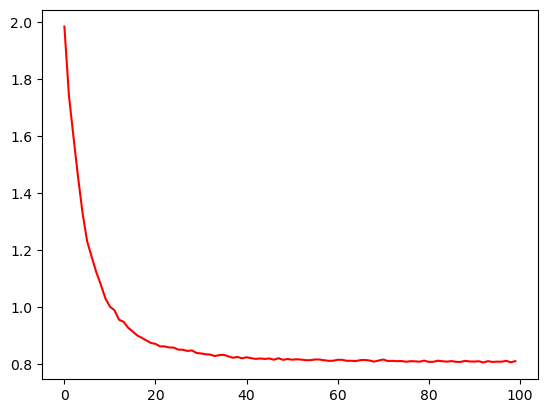

In [24]:
plt.plot(acc_values, 'b',)
plt.savefig('node2vec_acc.png')
plt.show()

plt.plot(loss_values, 'r')
plt.savefig('node2vec_loss.png')
plt.show()

In [16]:
z = model()
z[0]

NameError: name 'model' is not defined

In [18]:
embeddings = []
for emb in z:
    new = []
    for val in emb:
        new.append(val.item())
    embeddings.append(new)

len(embeddings)

835

In [19]:
bpms[0]
bpms[0].x.shape

torch.Size([11, 1])

In [20]:
data_emb = []
i = 0
for graph in bpms:
    emb = []
    edge_index = graph.edge_index
    edge_attr = graph.edge_attr
    y = graph.y
    train_mask = graph.train_mask
    test_mask = graph.test_mask
    for j, _ in enumerate(graph.x):
        emb.append(embeddings[i])
        i += 1
        
    new_data = Data(x=torch.tensor(emb, dtype=torch.float), 
            edge_index=edge_index,
            edge_attr=edge_attr,
            y=y,
            train_mask=train_mask,
            test_mask=test_mask
            )
    data_emb.append(new_data)

In [21]:
data_emb[0].x.shape[1]

8

In [22]:
dataset = data_emb

train_dataset = dataset[:int(len(dataset) * 1)]

print(f'Number of graphs total: {len(dataset)}')
print(f'Number of training graphs: {len(train_dataset)}')
print(dataset[0])

Number of graphs total: 43
Number of training graphs: 43
Data(x=[11, 8], edge_index=[2, 11], edge_attr=[11, 1], y=[11], train_mask=[11], test_mask=[11])


In [23]:
from torch_geometric.loader import DataLoader
from torch_geometric.data import Dataset, Data

NUM_GRAPHS_PER_BATCH = 8
hidden_channels = 32

train_loader = DataLoader(train_dataset, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

In [160]:
class GATGNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GATConv(embedding_dim, hidden_channels, heads=4, edge_dim=1)
        self.lin1 = torch.nn.Linear(embedding_dim, 4 * hidden_channels)
        
        self.conv2 = GATConv(4 * hidden_channels, hidden_channels, heads=4, edge_dim=1)
        self.lin2 = torch.nn.Linear(4 * hidden_channels, 4 * hidden_channels)
        
        
        self.conv3 = GATConv(4 * hidden_channels, len(final_classes), heads=6, concat=False, edge_dim=1)
        self.lin3 = torch.nn.Linear(4 * hidden_channels, len(final_classes))

        
    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        x = F.elu(self.conv1(x, edge_index, edge_attr) + self.lin1(x))
        x = F.elu(self.conv2(x, edge_index, edge_attr) + self.lin2(x))
        x = self.conv3(x, edge_index, edge_attr) + self.lin3(x)
        return F.log_softmax(x, dim=1)

In [161]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GATGNN().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
print(model)
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

GATGNN(
  (conv1): GATConv(8, 32, heads=4)
  (lin1): Linear(in_features=8, out_features=128, bias=True)
  (conv2): GATConv(128, 32, heads=4)
  (lin2): Linear(in_features=128, out_features=128, bias=True)
  (conv3): GATConv(128, 3, heads=6)
  (lin3): Linear(in_features=128, out_features=3, bias=True)
)
Number of parameters:  39118


In [162]:
def train():
    model.train()

    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
        total_loss += loss.item() * data.num_graphs
        loss.backward()
        optimizer.step()
    return total_loss / len(train_loader.dataset)

In [163]:
@torch.no_grad()
def test():
    model.eval()

    total_acc = 0
    for data in train_loader:
        pred = model(data).argmax(dim=1)
        correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
        acc = int(correct) / int(data.test_mask.sum())
        total_acc += acc * data.num_graphs
    return total_acc / len(train_loader.dataset)

@torch.no_grad()
def test_train():
    model.eval()

    total_acc = 0
    for data in train_loader:
        pred = model(data).argmax(dim=1)
        correct = (pred[data.train_mask] == data.y[data.train_mask]).sum()
        acc = int(correct) / int(data.train_mask.sum())
        total_acc += acc * data.num_graphs
    return total_acc / len(train_loader.dataset)

Epoch: 001, Loss: 1.1705, Train Acc: 0.4244, Test Acc: 0.3556
Epoch: 002, Loss: 1.0818, Train Acc: 0.3901, Test Acc: 0.4074
Epoch: 003, Loss: 1.0644, Train Acc: 0.4401, Test Acc: 0.4280
Epoch: 004, Loss: 1.0702, Train Acc: 0.4514, Test Acc: 0.4330
Epoch: 005, Loss: 1.0669, Train Acc: 0.4413, Test Acc: 0.3795
Epoch: 006, Loss: 1.0336, Train Acc: 0.4663, Test Acc: 0.4171
Epoch: 007, Loss: 1.0449, Train Acc: 0.4340, Test Acc: 0.4659
Epoch: 008, Loss: 1.0407, Train Acc: 0.4699, Test Acc: 0.4397
Epoch: 009, Loss: 1.0226, Train Acc: 0.4813, Test Acc: 0.4527
Epoch: 010, Loss: 1.0261, Train Acc: 0.4959, Test Acc: 0.4686
Epoch: 011, Loss: 1.0237, Train Acc: 0.4787, Test Acc: 0.4200
Epoch: 012, Loss: 1.0130, Train Acc: 0.4953, Test Acc: 0.3955
Epoch: 013, Loss: 1.0140, Train Acc: 0.4835, Test Acc: 0.4454
Epoch: 014, Loss: 1.0077, Train Acc: 0.4833, Test Acc: 0.4641
Epoch: 015, Loss: 1.0170, Train Acc: 0.4958, Test Acc: 0.4252
Epoch: 016, Loss: 1.0123, Train Acc: 0.4990, Test Acc: 0.4270
Epoch: 0

Epoch: 135, Loss: 0.4422, Train Acc: 0.8496, Test Acc: 0.5313
Epoch: 136, Loss: 0.4111, Train Acc: 0.8267, Test Acc: 0.5531
Epoch: 137, Loss: 0.4289, Train Acc: 0.8348, Test Acc: 0.5405
Epoch: 138, Loss: 0.4138, Train Acc: 0.8629, Test Acc: 0.5811
Epoch: 139, Loss: 0.4167, Train Acc: 0.8543, Test Acc: 0.5377
Epoch: 140, Loss: 0.4162, Train Acc: 0.8299, Test Acc: 0.5602
Epoch: 141, Loss: 0.4487, Train Acc: 0.8430, Test Acc: 0.5394
Epoch: 142, Loss: 0.4280, Train Acc: 0.8327, Test Acc: 0.5520
Epoch: 143, Loss: 0.4692, Train Acc: 0.8403, Test Acc: 0.5489
Epoch: 144, Loss: 0.4363, Train Acc: 0.8380, Test Acc: 0.5314
Epoch: 145, Loss: 0.5016, Train Acc: 0.8366, Test Acc: 0.5589
Epoch: 146, Loss: 0.4395, Train Acc: 0.8352, Test Acc: 0.5745
Epoch: 147, Loss: 0.4215, Train Acc: 0.8669, Test Acc: 0.5556
Epoch: 148, Loss: 0.3898, Train Acc: 0.8549, Test Acc: 0.5624
Epoch: 149, Loss: 0.3804, Train Acc: 0.8754, Test Acc: 0.5707
Epoch: 150, Loss: 0.3674, Train Acc: 0.8727, Test Acc: 0.5797
Epoch: 1

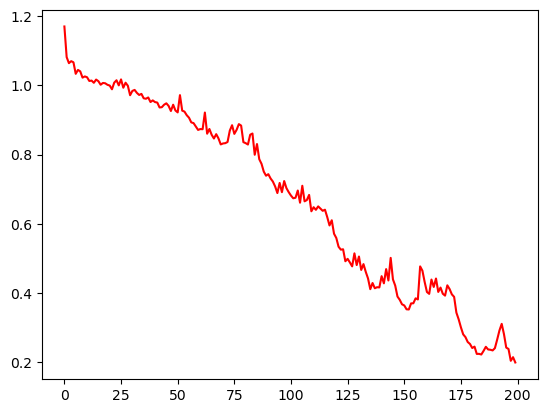

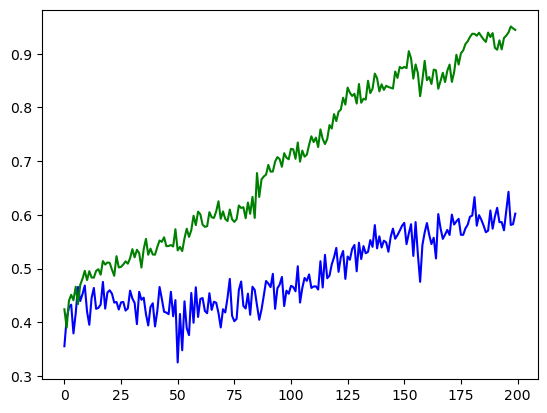

In [164]:
loss_values = []
train_acc_values = []
test_acc_values = []

for epoch in range(1, 201):
    loss = train()
    test_acc = test()
    train_acc = test_train()
    
    loss_values.append(loss)
    test_acc_values.append(test_acc)
    train_acc_values.append(train_acc)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
    if(acc > 0.61): break

plt.plot(loss_values, 'r',)
plt.savefig('loss_nc.png')
plt.show()
plt.plot(test_acc_values, 'b', train_acc_values, 'g')

plt.savefig('acc_nc.png')
plt.show()